## 5. Clustering
The first thing we need is to determine which variables are we going to use. We have three variables that measure time:

- The variable `age` has 5284 blanks, which is more than one third of the data. We cannot use this feature.

- The variable `Años de Antigüedad` has 2136 blanks.

- The variable `experience` has 1274 blanks.

We can see that a lot of variables have nana values, so we need to drop the variables that have most nan values, and then remove nan values

In [2]:
%run .\DA-cleaning.ipynb

In [12]:
%run .\functions.ipynb

In [4]:
data_prep = data[['age', 'antiguedad','experience','percentage_responsability','terminal_group','multicampus','main_professor','seniors','participation','teach_hours',
                  'lecture_hours', 'lab_hours','credits','total_norm', 'sni_yn', 'score','under_yn', 'mxn_yn']];
df_dum = pd.get_dummies(data_prep);

In [5]:
for i in df_dum:
    if sum((df_dum[i].isnull())*1)!=0:
        print(i,sum((df_dum[i].isnull())*1))

age 5102
antiguedad 2095
experience 1246
seniors 1
participation 1
score 51


In [6]:
# Drop variables with a lot of nan, and then replace nan with mean
df_dum = df_dum.drop(['age','antiguedad'],axis=1).fillna({'experience': df_dum.experience.mean(),'score':df_dum.score.mean()}).dropna()

## SNI

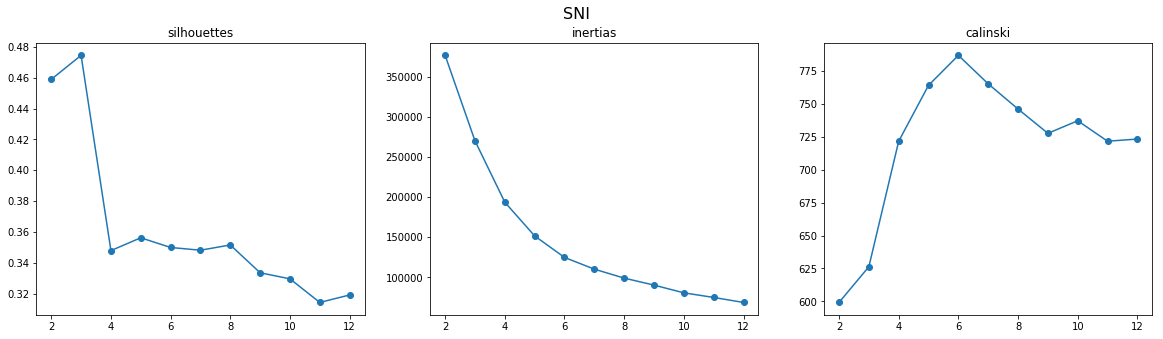

In [13]:
silhouettes,inertias,calinski = kmeans_cluster(2,13,df_dum[df_dum.sni_yn_SNI==1])
plt.figure(figsize=(20,5))
plt.suptitle("SNI", size=16)
plt.subplot(1,3,1); plt.plot(np.linspace(2,len(silhouettes)+1,len(silhouettes)), silhouettes, '-o'); plt.title('silhouettes')
plt.subplot(1,3,2); plt.plot(np.linspace(2,len(silhouettes)+1,len(inertias)), inertias, '-o'); plt.title('inertias')
plt.subplot(1,3,3); plt.plot(np.linspace(2,len(silhouettes)+1,len(calinski)), calinski, '-o'); plt.title('calinski')
plt.show()

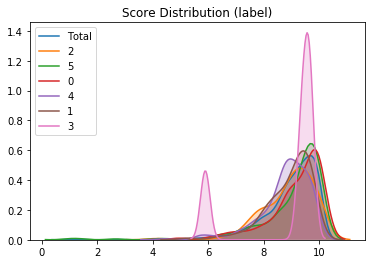

In [69]:
X = df_dum[df_dum.sni_yn_SNI==1]
kmeans = KMeans(n_clusters=6).fit(X)
labels = kmeans.labels_

X_prueba = X.copy()
X_prueba['label'] = labels

distribution_plot(X_prueba,'label')
plt.show()

## NO SNI

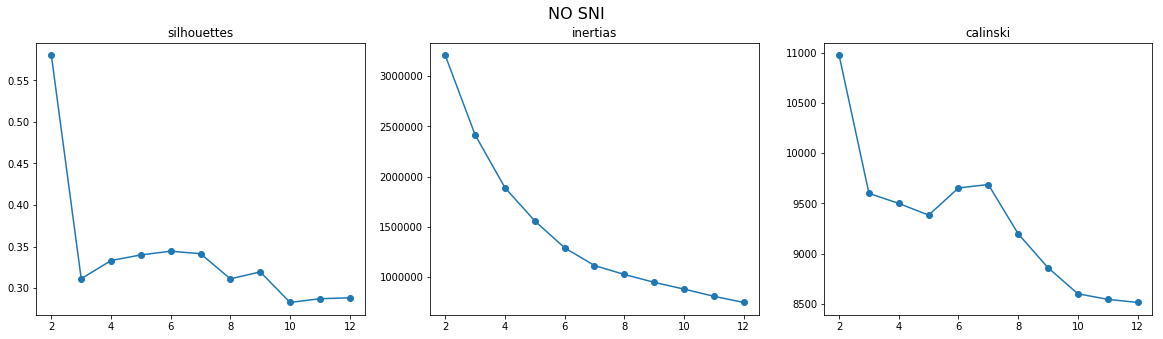

In [14]:
silhouettes,inertias,calinski = kmeans_cluster(2,13,df_dum[df_dum.sni_yn_SNI==0])
plt.figure(figsize=(20,5))
plt.suptitle("NO SNI", size=16)
plt.subplot(1,3,1); plt.plot(np.linspace(2,len(silhouettes)+1,len(silhouettes)), silhouettes, '-o'); plt.title('silhouettes')
plt.subplot(1,3,2); plt.plot(np.linspace(2,len(silhouettes)+1,len(inertias)), inertias, '-o'); plt.title('inertias')
plt.subplot(1,3,3); plt.plot(np.linspace(2,len(silhouettes)+1,len(calinski)), calinski, '-o'); plt.title('calinski')
plt.show()

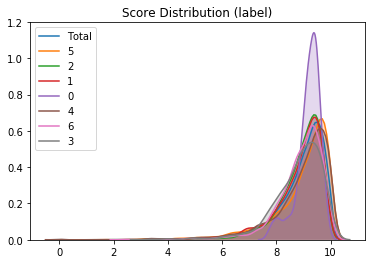

In [68]:
X = df_dum[df_dum.sni_yn_SNI==0]
kmeans = KMeans(n_clusters=7).fit(X)
labels = kmeans.labels_

X_prueba = X.copy()
X_prueba['label'] = labels

distribution_plot(X_prueba,'label')
plt.show()

## Undergraduate

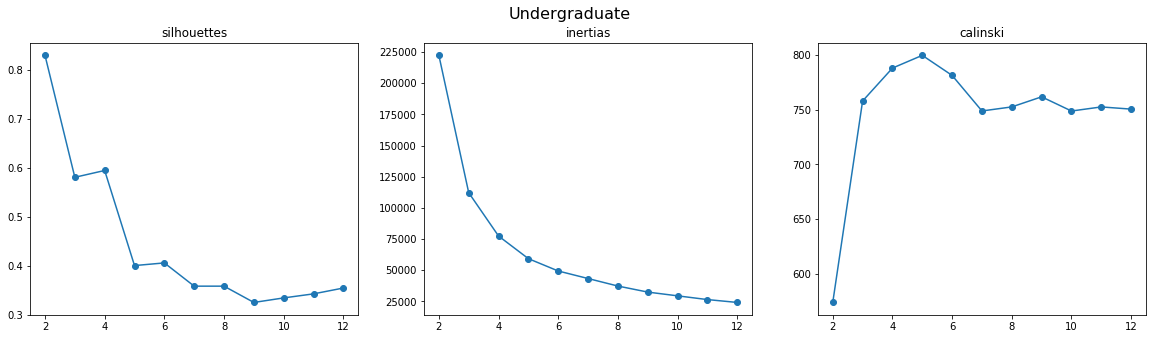

In [15]:
silhouettes,inertias,calinski = kmeans_cluster(2,13,df_dum[df_dum.under_yn_Graduate==1])
plt.figure(figsize=(20,5))
plt.suptitle("Undergraduate", size=16)
plt.subplot(1,3,1); plt.plot(np.linspace(2,len(silhouettes)+1,len(silhouettes)), silhouettes, '-o'); plt.title('silhouettes')
plt.subplot(1,3,2); plt.plot(np.linspace(2,len(silhouettes)+1,len(inertias)), inertias, '-o'); plt.title('inertias')
plt.subplot(1,3,3); plt.plot(np.linspace(2,len(silhouettes)+1,len(calinski)), calinski, '-o'); plt.title('calinski')
plt.show()

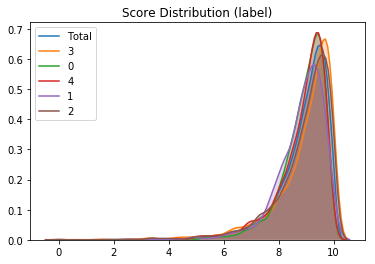

In [46]:
X = df_dum[df_dum.under_yn_Undergraduate==1]
kmeans = KMeans(n_clusters=5).fit(X)
labels = kmeans.labels_

X_prueba = X.copy()
X_prueba['label'] = labels

distribution_plot(X_prueba,'label')
plt.show()

## Graduate

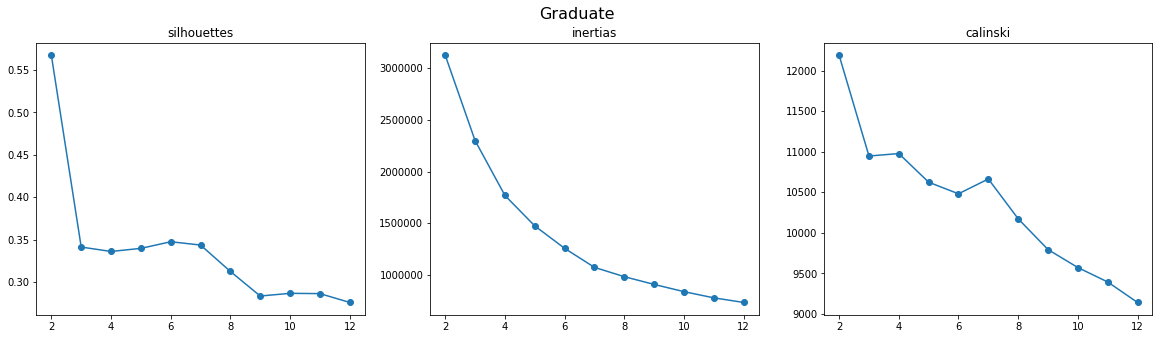

In [16]:
silhouettes,inertias,calinski = kmeans_cluster(2,13,df_dum[df_dum.under_yn_Graduate==0])
plt.figure(figsize=(20,5))
plt.suptitle("Graduate", size=16)
plt.subplot(1,3,1); plt.plot(np.linspace(2,len(silhouettes)+1,len(silhouettes)), silhouettes, '-o'); plt.title('silhouettes')
plt.subplot(1,3,2); plt.plot(np.linspace(2,len(silhouettes)+1,len(inertias)), inertias, '-o'); plt.title('inertias')
plt.subplot(1,3,3); plt.plot(np.linspace(2,len(silhouettes)+1,len(calinski)), calinski, '-o'); plt.title('calinski')
plt.show()

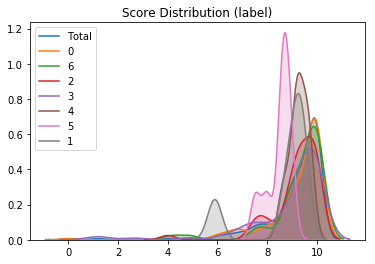

In [45]:
X = df_dum[df_dum.under_yn_Graduate==1]
kmeans = KMeans(n_clusters=7).fit(X)
labels = kmeans.labels_

X_prueba = X.copy()
X_prueba['label'] = labels

distribution_plot(X_prueba,'label')
plt.show()

### SNI & Graduate
The best number of clusters in this case is 4

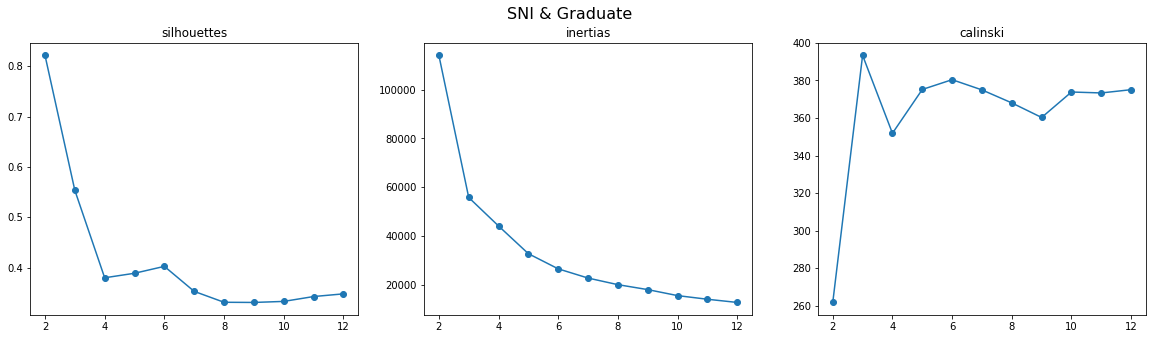

In [17]:
silhouettes,inertias,calinski = kmeans_cluster(2,13,df_dum[np.logical_and(df_dum.sni_yn_SNI==1,df_dum.under_yn_Graduate==1)])
plt.figure(figsize=(20,5))
plt.suptitle("SNI & Graduate", size=16)
plt.subplot(1,3,1); plt.plot(np.linspace(2,len(silhouettes)+1,len(silhouettes)), silhouettes, '-o'); plt.title('silhouettes')
plt.subplot(1,3,2); plt.plot(np.linspace(2,len(silhouettes)+1,len(inertias)), inertias, '-o'); plt.title('inertias')
plt.subplot(1,3,3); plt.plot(np.linspace(2,len(silhouettes)+1,len(calinski)), calinski, '-o'); plt.title('calinski')
plt.show()

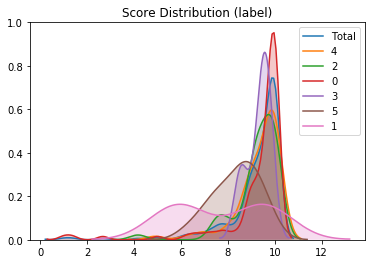

In [67]:
X = df_dum[np.logical_and(df_dum.sni_yn_SNI==1,df_dum.under_yn_Graduate==1)]
kmeans = KMeans(n_clusters=6).fit(X)
labels = kmeans.labels_

X_prueba = X.copy()
X_prueba['label'] = labels

distribution_plot(X_prueba,'label')
plt.show()

In [242]:
X = df_dum[df_dum.under_yn_Graduate==0]
cond1 = (X.score >= X.score.quantile(0.5)).replace([True,False],[1,0])
X['score_category'] = cond1.values # Creates a binary variable

X = X.drop(columns=[])

C:\Users\luiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [243]:
X_0 = X.drop(columns = ['under_yn_Graduate','score','score_category'])  # Removed feature "sepal length"
y_0 = X.score_category 

from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.30, random_state=5) #

In [244]:
# Ranks features, we selected 7 because is half of the features that he have
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train);
print(rfe.support_)
print(rfe.ranking_)

C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False False  True False False False False False False False
 False False False False False False False False]
[19  7 16 15  1  6 18 14  9 13 20 10 11 12  5  4  8  2  3 17]


In [245]:
lista = np.ndarray.tolist(rfe.ranking_)
columnas = X_train.columns
nueva_lista = []
for i in range(1,len(lista)+1):
    nueva_lista.append(columnas[lista.index(i)])

In [246]:
X_0['main_professor_NO']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       1
        ..
15205    1
15206    0
15207    0
15208    0
15209    0
15211    0
15212    0
15213    0
15214    0
15215    0
15216    0
15217    0
15218    0
15219    0
15220    0
15221    0
15222    0
15223    0
15224    0
15225    0
15226    0
15227    0
15228    0
15229    0
15230    1
15231    0
15232    0
15233    0
15234    0
15235    0
Name: main_professor_NO, Length: 14843, dtype: uint8

In [250]:
X = X_0[nueva_lista[0:11]]#,'sni_yn_NO SNI']]
y = y_0
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.689922
         Iterations 4
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.005     
Dependent Variable:          score_category          AIC:                     20501.0127
Date:                        2019-04-22 14:03        BIC:                     20577.0656
No. Observations:            14843                   Log-Likelihood:          -10241.   
Df Model:                    9                       LL-Null:                 -10288.   
Df Residuals:                14833                   LLR p-value:             1.1347e-16
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              4.0000                                                     
----------------------------------------------------------------------------------------
                           Coef.    Std.Err. 

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X[['participation',
                                                       'mxn_yn_Foreign',
                                                       'teach_hours',
                                                       'credits',
                                                       'terminal_group_SI']], y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [253]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53
